<h1 style="text-align: center">Analysis of Data Science Jobs Between 2020 and 2023</h1>

<h3 style="text-align: center">by</h3>

<h2 style="text-align: center">Akinyemi Apampa and David Fakolujo</h2>

<h4 style="text-align: center"><a href = "https://github.com/davidfakolujo/Data-601-Project">Github Repository</a></h4>

<div style="text-align: center">
    <img src = "data-science-job-titles.png" alt = "Project Image">
</div>
<p style="text-align: center"><i>Image source: <a href = "https://clarusway.com/data-science-jobs-you-can-apply/">Clarusway</i></a></p>

## Outline

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dataset"> Datasets</a></li>
<li><a href="#questions">Guiding Questions</a></li>
<li><a href="#cleaning">Data Cleaning and Preprocessing</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

Data Science is a broad field that uses scientific methods such as programming and statistics to extract meaningful insights from different forms of data. The field can be applied across diverse sectors to support data-driven decision making.

Since the Covid-19 pandemic, the demand for professionals in the data science field has experienced a substantial growth. This project explores the attributes surrounding Data Science jobs between 2020 and 2023.

The insights generated from this dataset’s exploration will be valuable to professionals seeking to transition into the data science field, as well as those already in the field, looking to widen their expertise or transform within the field.

<a id='dataset'></a>
## Datasets

The primary analysis will be conducted using a dataset from Kaggle, which contains data on data science jobs between 2020 and 2023. This is a singular, structured dataset that contains 3,755 rows and 11 columns consisting of key variables related to jobs in the data science field.

A complementary analysis will focus on the skills variable from a separate dataset, also retrieved from Kaggle. The dataset contains 12,217 rows that each contain skills required for data science related jobs posted on LinkedIn in January 2024.

Both datasets are publicly available on Kaggle, and we have permission to use them, as Kaggle is an open data source.

More information about the variables in the data science jobs dataset (2020 - 2023) are as follows:

- **work_year**: the year the salary was paid
- **experience_level**: The experience level in the job during the year
    * EN - Entry-level / Junior
    * MI -Mid-level / Intermediate
    * SE -Senior-level / Expert
    * EX - Executive-level / Director
- **employment_type**: The type of employment for the role
    * PT - Part-time
    * FT - Full-time
    * CT - Contract
    * FL - Freelance
- **job_title**: The role worked in during the year
- **salary**: The total gross salary amount paid
- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code 
- **salary_in_usd**: The salary in USD
- **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code
- **remote_ratio**: The overall amount of work done remotely
    * 0 - No remote work (less than 20%)
    * 50 - Partially remote/hybird
    * 100 - Fully remote (more than 80%)
- **company_location**: The country of the employer's main office or contracting branch 
- **company_size**: The median number of people that worked for the company during the year
    * S - less than 50 employees (small)
    * M - 50 to 250 employees (medium)
    * L - more than 250 employees (large)

<a id='questions'></a>
## Guiding Questions

**1**. What has been the growth rate in Data Science jobs in the past four years? 

This would inform people on whether Data Science has been a growing or declining field over the past four years. It would also provide insights to the availability and importance of Data Science jobs globally.

**2**. What is the overall distribution of salaries in the dataset, as well as the salary distribution across categorical variables, such as experience level, company size, remote status?

This analysis would give Data Scientists an idea of the salary expectations as they grow in experience and interact with different companies. It could also help with salary discussions before accepting job offers from companies.

**3**. What has been the trend over time of remote jobs in the Data Science field? 

Many companies now offer the option to work remotely. This analysis would give a job seeker an idea of the likelihood of securing a remote job.

**4**. What has the distribution of Data Science job titles been over the years, as well as the distribution per experience level and remote status?

This analysis can inform job seekers which roles are more popular and which roles are scarce. It can also guide people on which jobs to apply for, based on the demand for certain job titles.

**5**. What are the in demand skills in the Data Science field?

This would help job seekers have an idea of which skills to focus on in order to increase employability and to stay relevant in the Data Science field.

**6**. What are the proportions of employment types in the Data Science field?

This insight can help job seekers understand the distribution of Data Science roles in organizations and identify which employment types are most and least preferred. This can also improve job search by targeting specific job platforms that post jobs with specific employment types.


<a id='cleaning'></a>
## Data Cleaning and Preprocessing

#### Load and inspect the dataset

In [1]:
# import libraries and set plots to be embedded inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import regex as re
from scipy.stats import ttest_ind, chi2_contingency
import ipywidgets as widgets
from ipywidgets import interact
import plotly.graph_objs as go
from collections import Counter
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [2]:
# load datasets

df = pd.read_csv("ds_salaries.csv")

df_skills = pd.read_csv("job_skills.csv")

In [3]:
# view salaries dataset head

display(df.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
# view skills dataset head

display(df_skills.head())

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


In [5]:
# view salaries dataset info

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


None

In [6]:
# view skills dataset info

display(df_skills.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_link    12217 non-null  object
 1   job_skills  12212 non-null  object
dtypes: object(2)
memory usage: 191.0+ KB


None

> The output above indicates that the datasets do not contain any missing data.

> The skills dataset will be put aside for now and revisited when addressing guiding question 5.

#### Drop irrelevant columns

The salary column consists of salaries in different currencies, which will not give a consistent basis for the analysis of the salary behavior. Therefore, we will be using the salary_in_usd column for the analysis of salaries. As a result, the salary and salary_currency columns will be dropped.

In addition, since the initial audience for the analysis is based in Canada, a new column will be created to represent the salaries in Canadian Dollars (CAD), instead of United States Dollars (USD). This will be done by multiplying the salary_in_usd column by the exchange rate on a selected date.

The salary_in_usd column will also be dropped after.

In [7]:
# drop irrelevant columns

df.drop(['salary','salary_currency'], axis = 1, inplace = True)
display(df)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [8]:
# create new column with converted currency using exchange rate on 2/5/2025

df['salary_in_cad'] = df['salary_in_usd'] * 1.43

In [9]:
# drop salary_in_usd column as it is no longer necessary

df.drop(['salary_in_usd'], axis = 1, inplace = True) 

#### The job title column can be grouped into major categories of job titles based on similarities.

In [10]:
# view count distribution of job title column

df['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [11]:
# group job titles using regex

df['job_title'] = df['job_title'].replace(r'.*(Scientist|Science).*', 'Data Scientist', regex=True)

df['job_title'] = df['job_title'].replace(r'.*(Analyst|Analytics).*', 'Data Analyst', regex=True)

df['job_title'] = df['job_title'].replace(r'.*(Data.* Engineer|ETL).*', 'Data Engineer', regex=True)

df['job_title'] = df['job_title'].replace(r'.*(ML.* Engineer|Machine Learning).*', 'Machine Learning Engineer', regex=True)

df['job_title'] = df['job_title'].replace(r'.*(Data Architect).*', 'Data Architect', regex=True)

In [12]:
# view updated count distribution of job title column

df['job_title'].value_counts()

Data Scientist                       1181
Data Engineer                        1101
Data Analyst                          821
Machine Learning Engineer             375
Data Architect                        105
Research Engineer                      37
Data Manager                           29
Computer Vision Engineer               18
Data Specialist                        14
BI Developer                           13
AI Developer                           11
Head of Data                           10
NLP Engineer                            7
Deep Learning Engineer                  6
Computer Vision Software Engineer       5
3D Computer Vision Researcher           4
Business Intelligence Engineer          4
Data Strategist                         2
Data Modeler                            2
Autonomous Vehicle Technician           2
AI Programmer                           2
Data Lead                               2
Data Management Specialist              1
Deep Learning Researcher          

Looking at the updated count distribution above, autonomous vehicle technician is not a data science related job title. As a result, those rows will be dropped.

In [13]:
# drop autonomous vehicle techincian job title

df.drop(df[df['job_title'] == 'Autonomous Vehicle Technician'].index, inplace = True)

Following the initial grouping of job titles, the remaining job titles that we deem do not fall into any of the grouped categories will be grouped as Others

In [14]:
# create list of major job titles

major_jobs = df['job_title'].value_counts()[:5].index

In [15]:
# replace job titles not among the major job titles with 'Others'

df['job_title'] = df['job_title'].apply(lambda x: x if x in major_jobs else 'Others')

In [16]:
# view updated count distribution of job title column

df['job_title'].value_counts()

Data Scientist               1181
Data Engineer                1101
Data Analyst                  821
Machine Learning Engineer     375
Others                        170
Data Architect                105
Name: job_title, dtype: int64

In [17]:
# display updated data frame

display(df)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_cad
0,2023,SE,FT,Data Scientist,ES,100,ES,L,122761.21
1,2023,MI,CT,Machine Learning Engineer,US,100,US,S,42900.00
2,2023,MI,CT,Machine Learning Engineer,US,100,US,S,36465.00
3,2023,SE,FT,Data Scientist,CA,100,CA,M,250250.00
4,2023,SE,FT,Data Scientist,CA,100,CA,M,171600.00
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,US,100,US,L,589160.00
3751,2021,MI,FT,Data Scientist,US,100,US,L,215930.00
3752,2020,EN,FT,Data Scientist,US,100,US,S,150150.00
3753,2020,EN,CT,Data Analyst,US,100,US,L,143000.00


Some columns have their values as abbreviations / numerical categories. To avoid confusion, these columns will be replaced with their full meanings.

In [18]:
# create remote_status column that interprets the remote ratio as In-Person, Hybrid or Fully Remote

df['remote_status'] = df['remote_ratio'].replace({0:'In-Person', 50:'Hybrid', 100:'Fully Remote'})

In [19]:
# drop remote ratio column

df.drop('remote_ratio', axis = 1, inplace = True)

In [20]:
# rename abbreviations of experience_level, employment_type and company_size with their full meanings

df['experience_level'] = df['experience_level'].replace({'EN':'Entry', 'MI':'Mid', 
                                                         'SE':'Senior', 'EX':'Executive'})

df['employment_type'] = df['employment_type'].replace({'PT':'Part Time', 'FT':'Full Time', 
                                                  'CT':'Contract', 'FL':'Freelance'})

df['company_size'] = df['company_size'].replace({'S':'Small', 'M':'Medium', 'L':'Large'})

In [21]:
# display updated data frame

display(df)

,work_year,experience_level,employment_type,job_title,employee_residence,company_location,company_size,salary_in_cad,remote_status
0,2023,Senior,Full Time,Data Scientist,ES,ES,Large,122761.21,Fully Remote
1,2023,Mid,Contract,Machine Learning Engineer,US,US,Small,42900.00,Fully Remote
2,2023,Mid,Contract,Machine Learning Engineer,US,US,Small,36465.00,Fully Remote
3,2023,Senior,Full Time,Data Scientist,CA,CA,Medium,250250.00,Fully Remote
4,2023,Senior,Full Time,Data Scientist,CA,CA,Medium,171600.00,Fully Remote
...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full Time,Data Scientist,US,US,Large,589160.00,Fully Remote
3751,2021,Mid,Full Time,Data Scientist,US,US,Large,215930.00,Fully Remote
3752,2020,Entry,Full Time,Data Scientist,US,US,Small,150150.00,Fully Remote
3753,2020,Entry,Contract,Data Analyst,US,US,Large,143000.00,Fully Remote


Our primary focus of the analysis is on jobs in North America. Therefore, the data will be filtered to include only jobs with companies located in Canada or the United States of America.

In [22]:
# filter data to include only Canada and US jobs

df = df[(df['company_location'] == 'US') | (df['company_location'] == 'CA')] 

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

The EDA would involve exploring summary statistics of the continuous variable, detecting outliers and handling them appropriately, answering the guiding questions, and performing some hypothesis testings.

### Summary Statistics

In [23]:
# generate summary statistics for numerical features

df.describe()

,work_year,salary_in_cad
count,3127.000000,3127.000000
mean,2022.456988,216313.565603
std,0.618536,80442.330414
min,2020.000000,8120.970000
25%,2022.000000,161447.000000
50%,2023.000000,207350.000000
75%,2023.000000,264550.000000
max,2023.000000,643500.000000


The describe function only applies to the salaries_in_cad column. The following observations can be gotten from the summary:

- Average salary in cad is 216,313.57 while the standard deviation is 80,442.33. The high standard deviation shows that the salaries have a high variation. 

- The minimum salary is 8,120.97, which could indicate a part time/contract/freelance job, while the maximum salary is 643,500.00, which could indicate the salary paid by a large company to employees with the highest experience level.

- 25% of the data earn less than 161,447.00, while 25% earn more than 264,550.00. The median salary is 207,350.00.

- The mean being greater than the median indicates that the salary distribution is right skewed. This is reasonable, as fewer employees are expected to earn the highest salaries.

### Outliers

We will use the interquartile range (IQR) method to identify any outliers in the salary_in_cad column and handle them accordingly.

In [24]:
# calculate Q1 and Q3
Q1 = df['salary_in_cad'].quantile(0.25)
Q3 = df['salary_in_cad'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 161447.0
Q3: 264550.0
IQR: 103103.0


In [25]:
# calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: 6792.5
Upper Bound: 419204.5


In [26]:
# identify outliers
outliers = df[(df['salary_in_cad'] < lower_bound) | (df['salary_in_cad'] > upper_bound)]
print(f"Number of outliers in Fare: {outliers.shape[0]}")

Number of outliers in Fare: 60


In [27]:
# display the minimum and maximum outliers

print("Minimum outlier: {}".format(outliers['salary_in_cad'].min()))
print("Maximum outlier: {}".format(outliers['salary_in_cad'].max()))

Minimum outlier: 425139.0
Maximum outlier: 643500.0


Based on the minimum and maximum outliers above, these values likely represent expected salaries that large companies could pay employees at the highest experience levels. As a result, we would not be removing these values from the dataset, as they could also provide meaningful and important insights.

### Visualizations

#### 1. What has been the growth rate in Data Science jobs in the past four years?

A line plot will be to created to visualize the trend of data science job availability over time from 2020 to 2023.

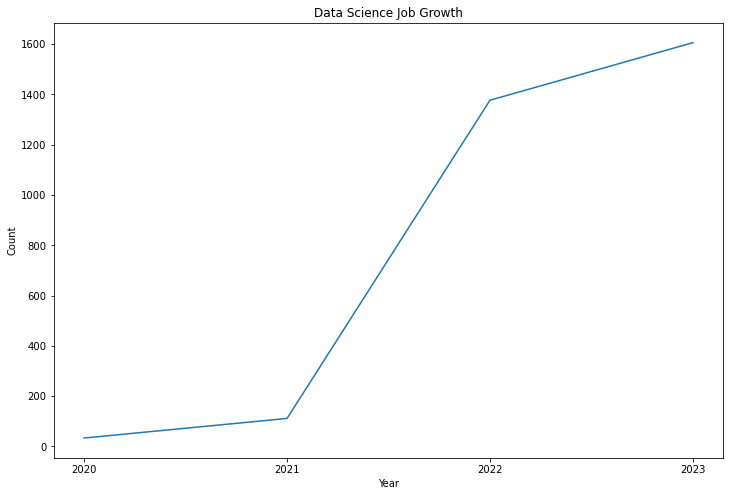

In [28]:
# create a line plot to show the growth of the data science field over the past four years

growth_rate = df['work_year'].value_counts()
plt.figure(figsize=(12, 8))
plt.plot(growth_rate.index,growth_rate.values)
plt.xticks(growth_rate.index)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Data Science Job Growth')
plt.show()

> The plot above shows that  the data science job market experienced significant growth from 2020 to 2023, indicating an increase in job demand. There was a particularly significant surge in data science roles from 2021-2022 signifying a boom in the industry during those years. 

#### 2. What is the overall distribution of salaries in the dataset, as well as the salary distribution across categorical variables, such as experience level, company size, remote status? 

We will start by first displaying the overall salary distribution.

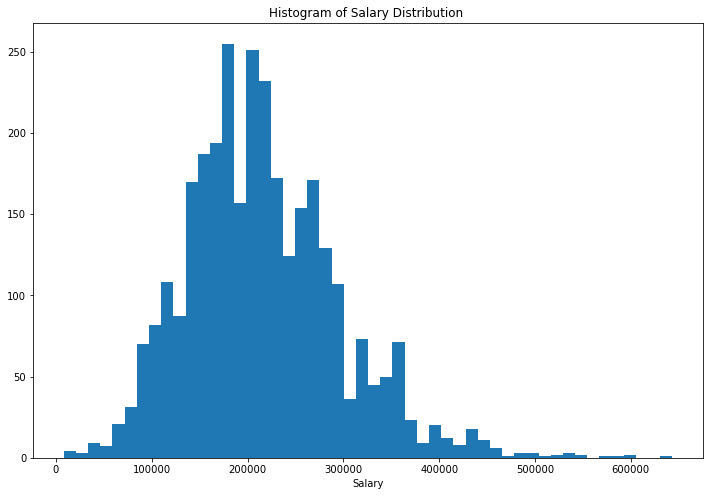

In [29]:
# plot a histogram of salary distribution 

plt.figure(figsize=(12, 8))
plt.hist(df['salary_in_cad'], bins = 50)
plt.title("Histogram of Salary Distribution ")
plt.xlabel("Salary")
plt.show()

> The histogram reveals that majority of data science salaries fall between 150,000 and 300,000, indicating that most roles in the field offer competitive salaries. Fewer salaries are below 150,000 or above 300,000. There are a small number of roles that pay more 400,000, which could indicate positions that require the highest experience levels. This also explain the slight right skewness of the distribution.

Next, we will segment the salaries based on several categorical variables, starting with histograms of the salary distributions per year.

In [30]:
# generate histograms of salary distributions across the years

bar = go.Histogram()
fig_bar = go.FigureWidget(data=bar)

@interact(year=[2020, 2021, 2022, 2023])
def update_bar(year=2023):
    data = df[df['work_year'] == year]['salary_in_cad']
    fig_bar.update_traces(
                          x=data, nbinsx = 100)
    fig_bar.update_layout(title_text="Salary Distribution in {0}".format(year), 
                          xaxis_title = 'Salary', yaxis_title = 'Frequency')

fig_bar

interactive(children=(Dropdown(description='year', index=3, options=(2020, 2021, 2022, 2023), value=2023), Out…

FigureWidget({
    'data': [{'nbinsx': 100,
              'type': 'histogram',
              'uid': '4578763c-fff1-4d84-9ed5-f88d077054e5',
              'x': array([ 42900.,  36465., 250250., ..., 128700., 228800., 193050.])}],
    'layout': {'template': '...',
               'title': {'text': 'Salary Distribution in 2023'},
               'xaxis': {'title': {'text': 'Salary'}},
               'yaxis': {'title': {'text': 'Frequency'}}}
})

The widget function above to display the salary distribution acroos the years might not work on all versions of jupyter notebook. As a result, the distributions would be plotted again below using regular matplotlib

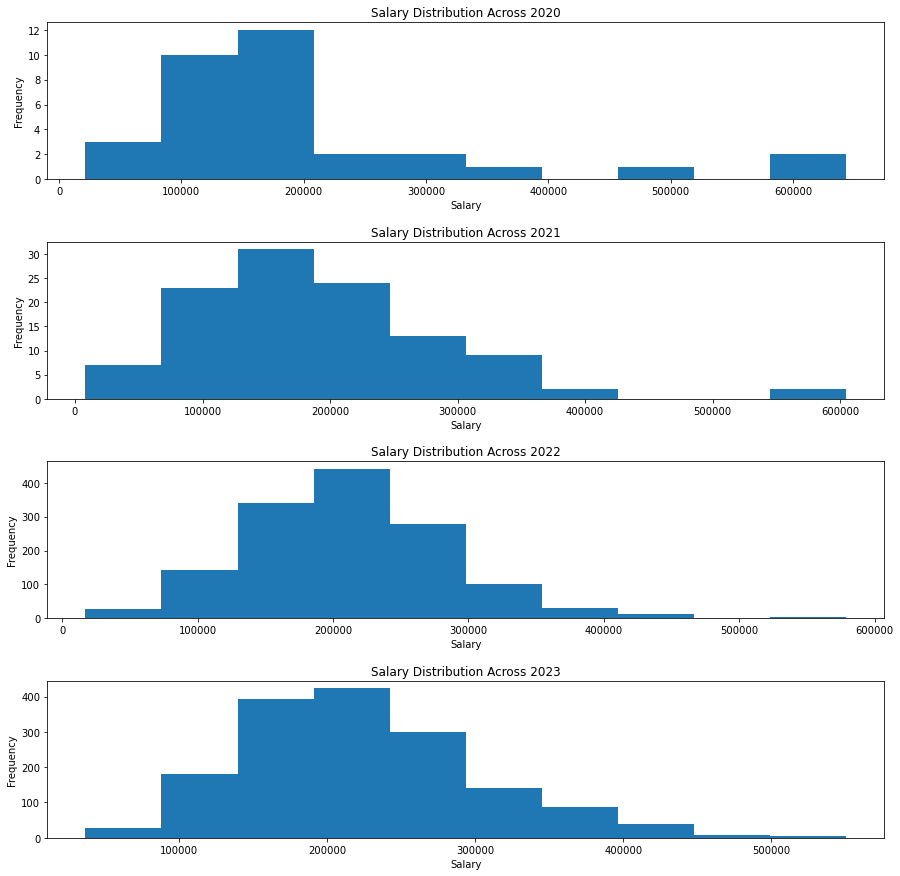

In [31]:
# plot histograms of salary distributions across years

fig, ax = plt.subplots(4, 1, figsize=(15, 15))

# salary distribution across 2020
ax[0].hist(df[df['work_year'] == 2020]['salary_in_cad'])
ax[0].set_title('Salary Distribution Across 2020')
ax[0].set_xlabel('Salary')
ax[0].set_ylabel('Frequency')

# salary distribution across 2021
ax[1].hist(df[df['work_year'] == 2021]['salary_in_cad'])
ax[1].set_title('Salary Distribution Across 2021')
ax[1].set_xlabel('Salary')
ax[1].set_ylabel('Frequency')

# salary distribution across 2022
ax[2].hist(df[df['work_year'] == 2022]['salary_in_cad'])
ax[2].set_title('Salary Distribution Across 2022')
ax[2].set_xlabel('Salary')
ax[2].set_ylabel('Frequency')

# salary distribution across 2023
ax[3].hist(df[df['work_year'] == 2023]['salary_in_cad'])
ax[3].set_title('Salary Distribution Across 2023')
ax[3].set_xlabel('Salary')
ax[3].set_ylabel('Frequency')

plt.subplots_adjust(hspace = 0.4)
plt.show()

> The salary distribution in 2020 was relatively sparse, with most salaries between 100,000 and 200,000. There were very few high-paying roles of above 300,000. The general frequency of salaries was also low.

> With an increase in jobs from 2020 to 2021, a noticeable increase in salaries can be observed, especially between 200,000 and 300,000. The few high-paying roles of above 300,000 were similar to those in 2020.

> The salary distribution in 2022 was much wider, with most salaries falling between 150,000 and 250,000. There was also a more consistent spread across different salary ranges. In addition, the high-paying roles of above 300,000 increased slightly too.

> The salary distribution in 2023 showed some similarities to the ditrubution in 2022, with most salaries falling between 150,000 and around 300,000, and a decrease in higher salaries of 400,000 and above. The distribution seems more stable with an increase in overall salary compared to earlier years.

We will also plot a bar chart to observe the average salaries across the years

In [32]:
# group salaries by work year

average_salary = df.groupby('work_year')['salary_in_cad'].mean()

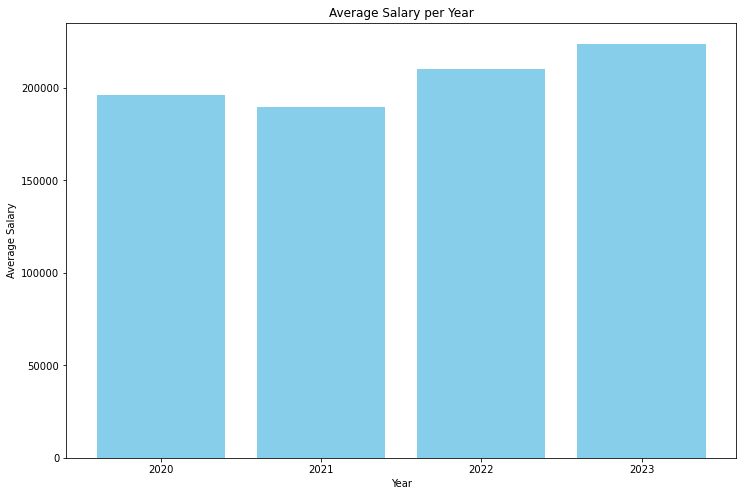

In [33]:
# plot bar chart

plt.figure(figsize=(12, 8))
bar = plt.bar(average_salary.index, average_salary.values, color='skyblue')
plt.title("Average Salary per Year")
plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.xticks(average_salary.index)
plt.show()

> The average salary had a slight decrease from 2020 to 2021 before increasing from 2021 to 2022 and also from 2022 to 2023. The high average salaries is yet another sign that the data science field offers good compensation.

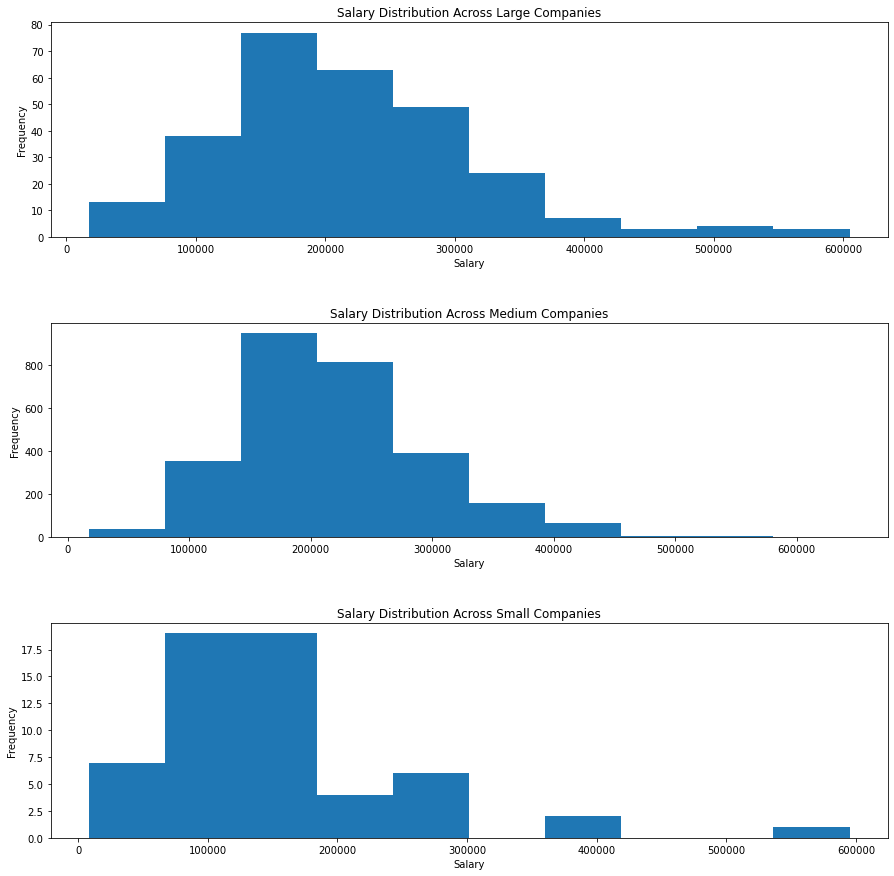

In [34]:
# plot histograms of salary distributions across company sizes

fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# salary distribution across large companies
ax[0].hist(df[df['company_size'] == 'Large']['salary_in_cad'])
ax[0].set_title('Salary Distribution Across Large Companies')
ax[0].set_xlabel('Salary')
ax[0].set_ylabel('Frequency')

# salary distribution across medium companies
ax[1].hist(df[df['company_size'] == 'Medium']['salary_in_cad'])
ax[1].set_title('Salary Distribution Across Medium Companies')
ax[1].set_xlabel('Salary')
ax[1].set_ylabel('Frequency')

# salary distribution across small companies
ax[2].hist(df[df['company_size'] == 'Small']['salary_in_cad'])
ax[2].set_title('Salary Distribution Across Small Companies')
ax[2].set_xlabel('Salary')
ax[2].set_ylabel('Frequency')

plt.subplots_adjust(hspace = 0.4)
plt.show()

> The distribution in large companies had most salaries falling between 100,000 and 300,000, with some right skewness, as expected, due to the few high salaries of about 300,000 and above. Medium companies had a similar distribution to large companies, while small companies had most of the salaries distributed within 100,000 and 200,000, with very few salaries above 300,000. This suggests small companies generally offer lower salaries when compared to medium and larger companies, possibly due to budget constraints.


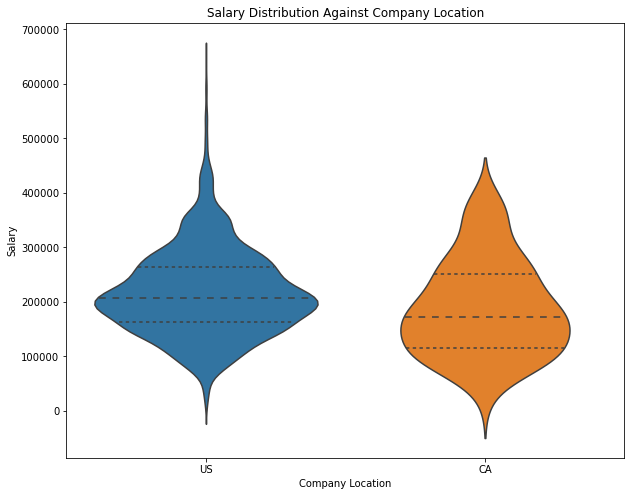

In [35]:
# plot a violin plot of salary against company location

plt.figure(figsize=(10, 8))

sns.violinplot(data = df, x = 'company_location', y = 'salary_in_cad', inner = 'quartile')
plt.title('Salary Distribution Against Company Location')
plt.xlabel('Company Location')
plt.ylabel('Salary')
plt.show()

> The violin plots above show that the salary distribution for data science jobs in the US had a wider spread than in Canada. The US had salaries as high as 700,000, while Canada had as high as close to 500,000. The US also had a larger concentration of roles around 200,000, while in Canada, the salaries were more concentrated between 100,000 and 200,000. This suggests that data science jobs in the US generally offer higher compensation compared to Canada, possibly due to various factors, such as market demand, cost of living, industry standards, etc.

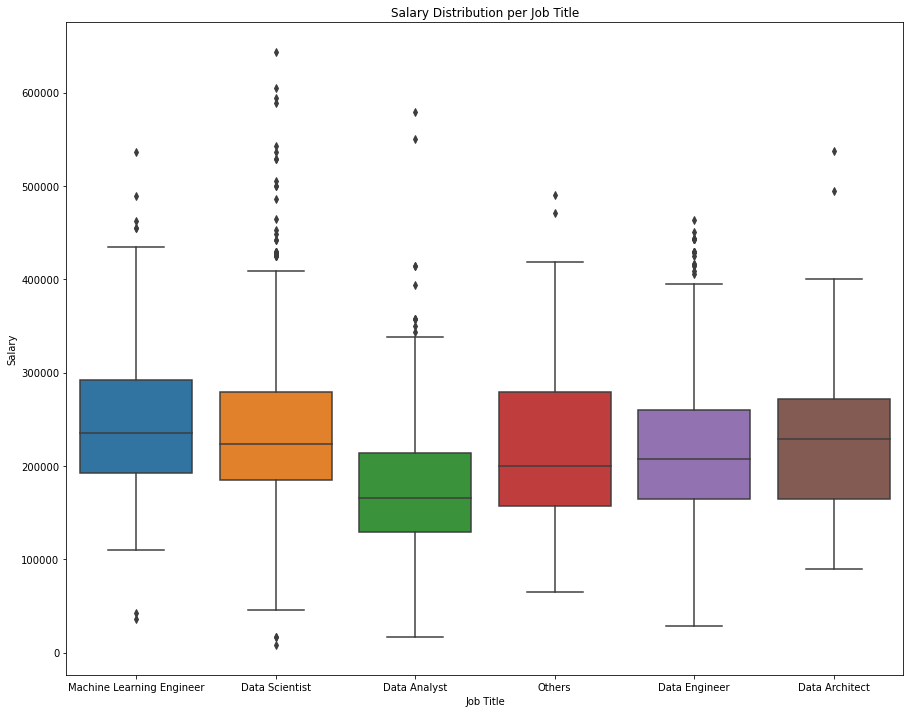

In [36]:
# plot box plots of salary against job title

plt.figure(figsize=(15, 12))
sns.boxplot(data=df, x='job_title', y='salary_in_cad')
plt.title('Salary Distribution per Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

> Machine Learning Engineers and Data Architects had the highest median salaries around 250,000. Their salary distributions also show some outliers reaching above 500,000.

> Data Scientists, Data Engineers, and Others have similar median salaries slightly above 200,000. However, their distributions vary, with Data Scientists having many outliers, followed by Data Engineers, with Others having the fewest outliers.

> Data Analysts have the lowest median salary around 175,000, with a couple of outliers that are close to 600,000.

> All roles have outliers, especially Data Scientists. These outliers suggest profssionals with the highest experience levels earn significantly higher salaries.

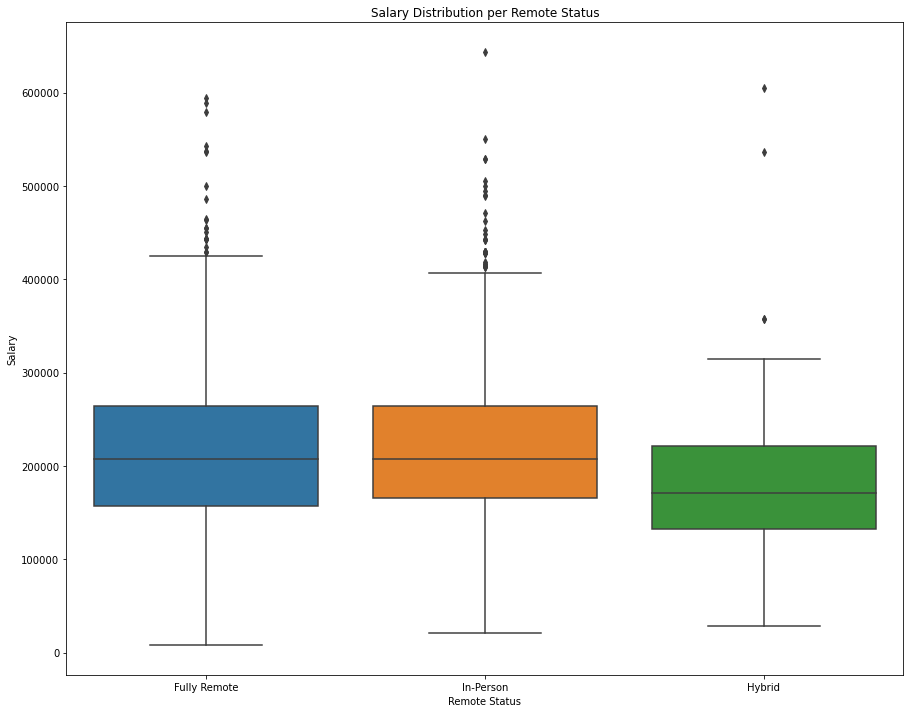

In [37]:
# plot box plot of salary against remote status

plt.figure(figsize=(15, 12))
sns.boxplot(data=df, x='remote_status', y='salary_in_cad')
plt.title('Salary Distribution per Remote Status')
plt.xlabel('Remote Status')
plt.ylabel('Salary')
plt.show()

> The boxplots above show that fully remote and in person jobs had similar median ariund 200,000 while hybrid salaries had a median of about 175,000. In person jobs had the highest outliers, as well as fully remote jobs, while hybrid jobs had extremely few outliers. In addition, hybrid roles had the lowest salary spread, while fully remote and in person roles showed more salary variation.

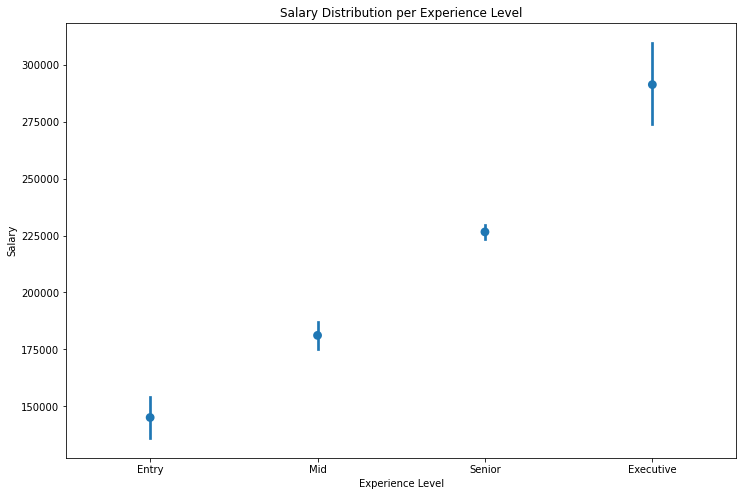

In [38]:
# view point plots of salaries for each experience level

order = ['Entry', 'Mid', 'Senior', 'Executive']
plt.figure(figsize=(12, 8))
sns.pointplot(data=df, x='experience_level', y='salary_in_cad', order = order, linestyles = "")
plt.title('Salary Distribution per Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

> The plot above shows that the average salaries increase with experience, as expected. The plot also shows that senior roles have the lowest salary variation, followed by mid, roles, entry roles, while executive roles have the highest salary variation, indicating a wider range of salaries at this level. This plot confirms that experience level strongly impacts salary.

In [39]:
# group salary by employment type

average_salary = df.groupby('employment_type')['salary_in_cad'].mean().sort_values(ascending = False)

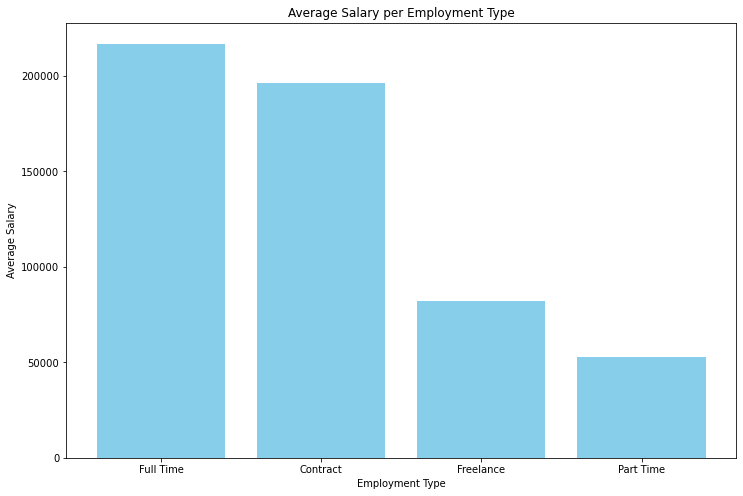

In [40]:
# plot bar chart

plt.figure(figsize=(12, 8))
bar = plt.bar(average_salary.index, average_salary.values, color='skyblue')
plt.title("Average Salary per Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Average Salary")
plt.show()

> Full time roles had the highest average salary. The average salary of contract roles were not so far behind. However, freelance roles had a significantly lower average salary, followed by that of part time, which is expected as part time workers do not work the same number of hours that the other employment types do.

We will also plot multivariate visualizations to compare the salary distribution across two categorical columns

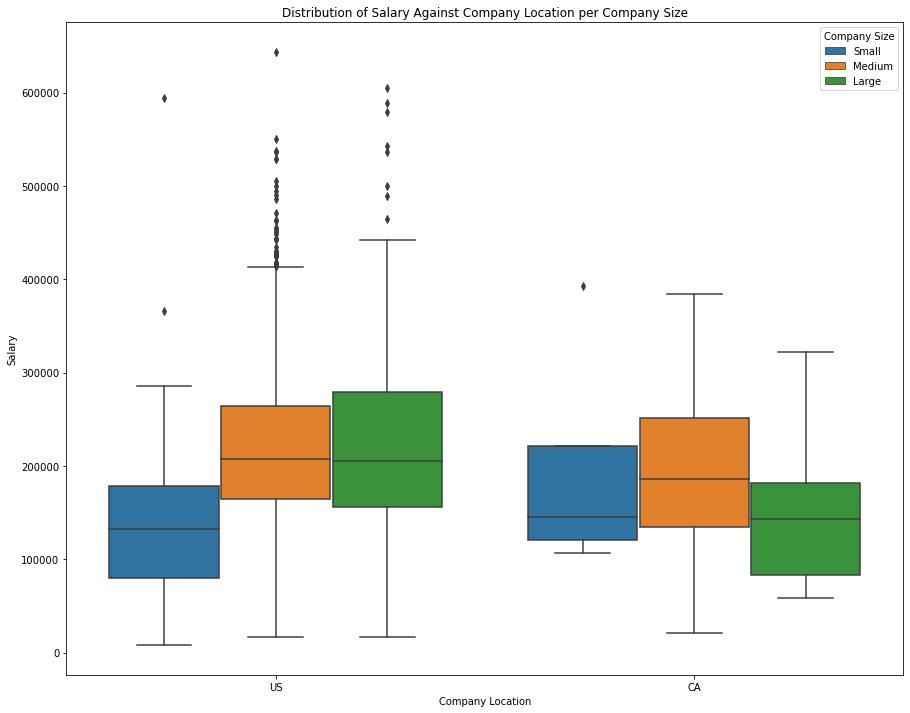

In [41]:
# plot box plots of salary against company location and segment on the different company sizes

plt.figure(figsize=(15, 12))
sns.boxplot(data=df, x='company_location', y='salary_in_cad', hue = 'company_size')
plt.title('Distribution of Salary Against Company Location per Company Size')
plt.xlabel('Company Location')
plt.ylabel('Salary')
plt.legend(title = 'Company Size')
plt.show()

> The boxplots above show that for medium companies in the US had a slightly higher median than medium companies in Canada, while large companies in the US had a more obvious median than Canadian large companies. For small companies, Canadian small companies had a slightly higher median than the small companies in the US.

> Small companies in both US and Canada had the smallest salary ranges. Canadian companies had generally smaller ranges than US companies.

> It is also observed that medium and large companies in the US had a lot of outliers of over 400,000, while medium and large companies in Canada had no outliers at all.

> This visualization suggests that company size and location significantly impact salary, with larger companies and US-based roles offering higher compensation.

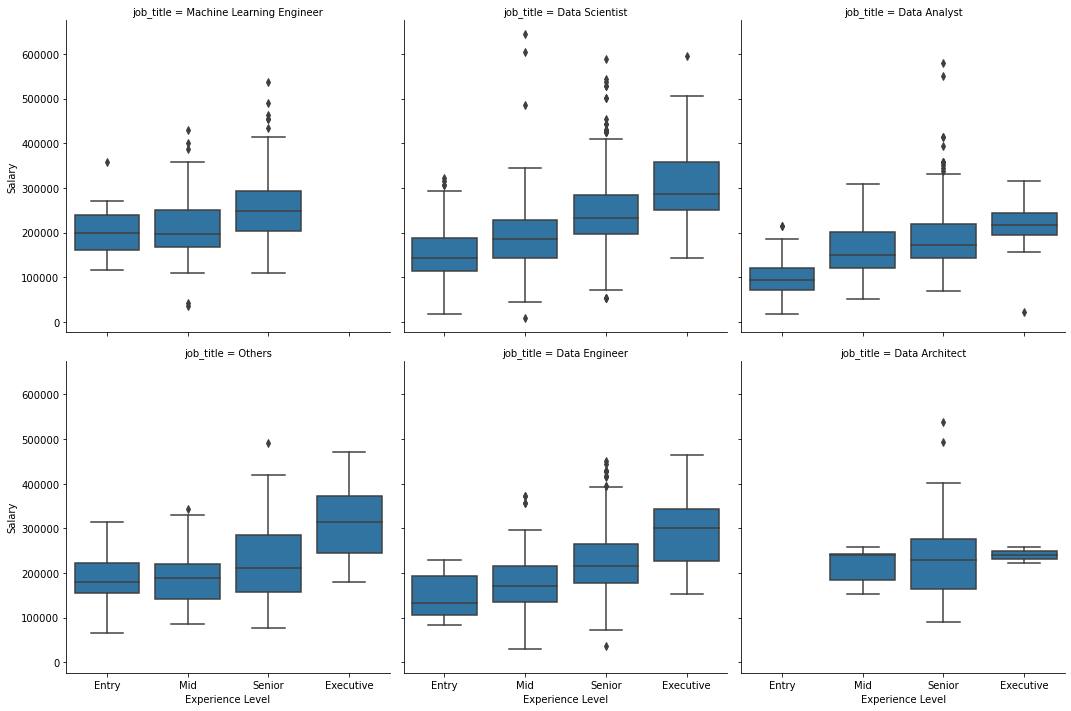

In [42]:
# plot boxplots of salaries against experience level and facet by job title

g = sns.FacetGrid(data = df, col = 'job_title', col_wrap = 3, height = 5)
g.map(sns.boxplot, 'experience_level', 'salary_in_cad', order = order)
g.set_axis_labels("Experience Level", "Salary");

> The facet grid shows that salaries increase with experience across all job titles, with executives earning the highest, as expected. However, Senior Data Architects seem to have a wider salary distribution than Executives, meaning Senior salaries vary more, even though the median salary is lower than that of Executives.

> Data Analysts earn the least, with lower medians and tighter salary ranges across all experience levels.

> Senior and Executive roles have more variability, with some extreme high salaries, particularly in Machine Learning Engineers and Data Scientists, while entry-level salaries are more concentrated across all levels, with fewer outliers.

> It is also observed that there were no Machine Learning Engineers at the executive level and there were no entry level Data Architects. This could be a sign of executive Machine Learning Engineers being very rare and entry level Data Architects not being in high demand.

#### 3. What has been the trend over time of remote jobs in the Data Science field?

This question will be addressed by viewing the general distribution of the remote status of jobs, followed by the further segmentation by years

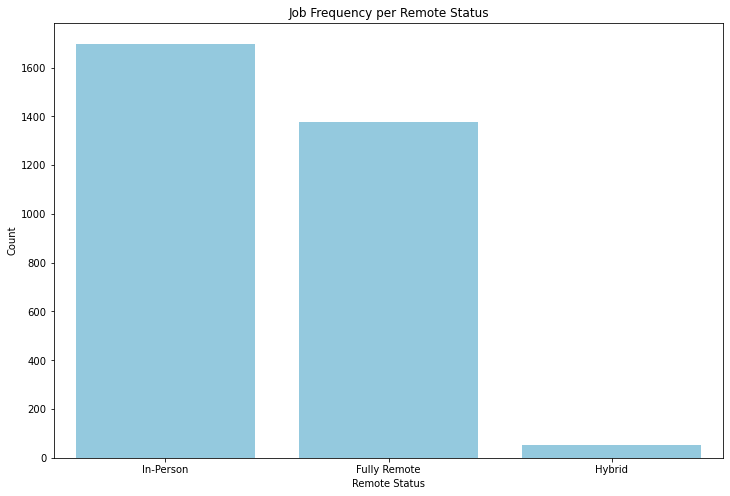

In [43]:
# plot bar chart of remote status

plt.figure(figsize=(12, 8))
sns.countplot(data = df, x = 'remote_status', color='skyblue', order = df['remote_status'].value_counts().index)
plt.title('Job Frequency per Remote Status')
plt.xlabel('Remote Status')
plt.ylabel('Count')
plt.show()

> The bar chart shows that in-person jobs are the most common, closely followed by fully remote roles. Hybrid roles are significantly less frequent, making up only a small fraction of the dataset. This suggests that while remote work is widely available, fully remote jobs are still less common than in-person roles.

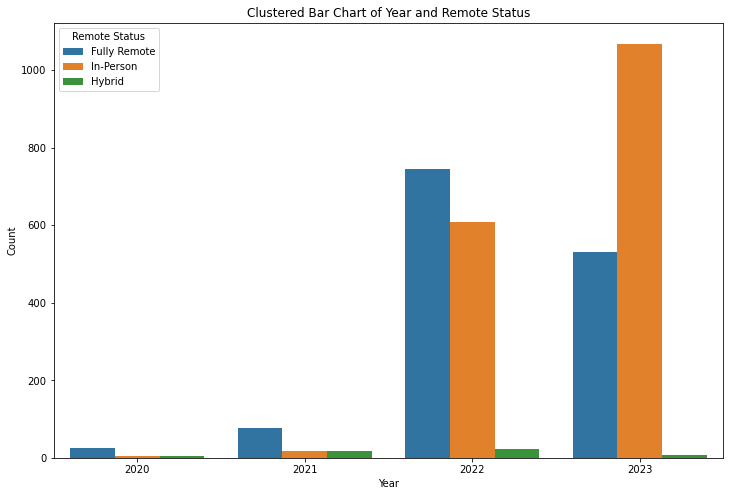

In [44]:
# plot clustered bar chart of work year and remote status

plt.figure(figsize=(12, 8))
sns.countplot(data = df, x = 'work_year', hue = 'remote_status')
plt.title('Clustered Bar Chart of Year and Remote Status')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title = 'Remote Status')
plt.show()

> Fully remote jobs had the highest proportion of jobs from 2020 to 2022, possibly due to the Covid-19 era. However, there was a significant shift the following year, with in-person jobs having the highest proportion of jobs in 2023, suggesting that many companies are gradually returning to the pre-Covid norm of working in person. Hybrid roles have been consistenly low through the years, making up only a small fraction of the dataset per year.

#### 4. What has the distribution of Data Science job titles been over the years, as well as the distribution per experience level and remote status?

This would be explored by viewing the general data science job distribution, followed by year, remote status and experience level

In [45]:
# view the distribution of data science industry positions

job_total = df['job_title'].value_counts()

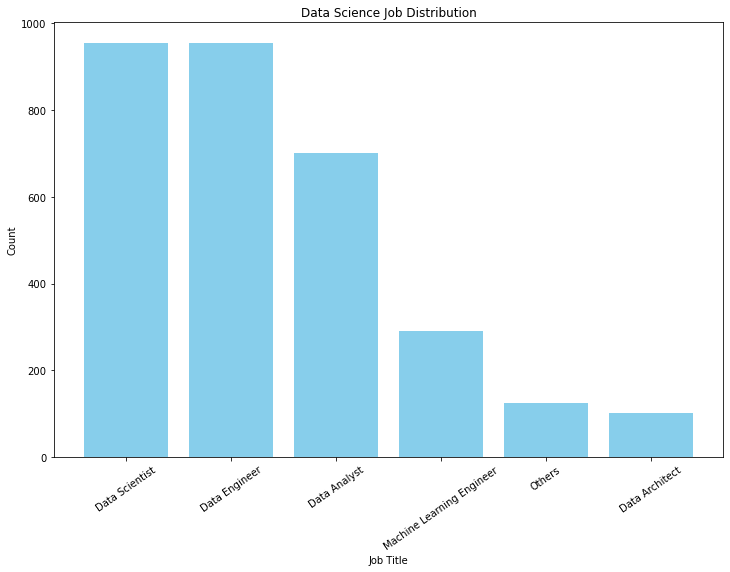

In [46]:
# create a bar chart that shows the distribution of jobs 

plt.figure(figsize=(12, 8))
plt.bar(job_total.index, job_total.values, color='skyblue')
plt.title("Data Science Job Distribution")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation = 35)
plt.show()

> The plot indicates that Data Scientists and Data Engineers are the most common job titles, with nearly equal counts. This is followed by Data Analysts, though significantly fewer than the top two. Machine Learning Engineer roles are less frequent, while Data Architect roles are the least common. The "Others" category also has a small count, suggesting there is a small proportion of less-defined roles in data science. This suggests that Data Science and Data Engineering roles dominate the industry, while roles like Machine Learning Engineers and Data Architects are less common.

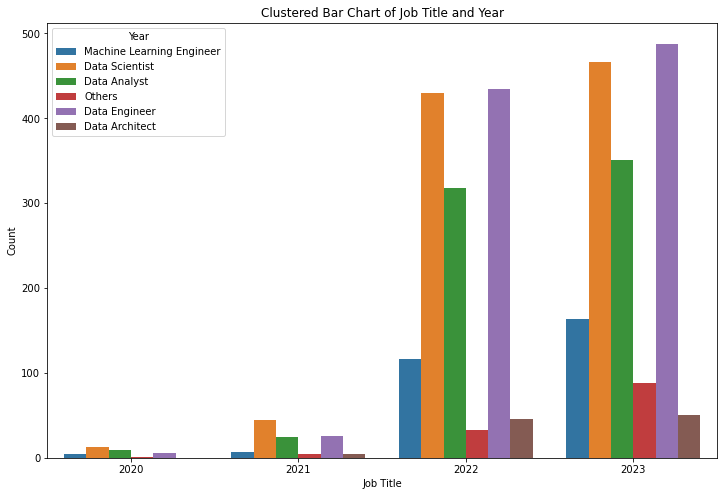

In [47]:
# plot clustered bar chart of job title and work year

plt.figure(figsize=(12, 8))
sns.countplot(data = df, x = 'work_year', hue = 'job_title')
plt.title('Clustered Bar Chart of Job Title and Year')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.legend(title = 'Year')
plt.show()

> Data Scientists started off as being the most common job role in 2020. However, the proportion of Data Engineers steadily increased, surpassing Data Scientists as the most common job role in 2023. The proportions of the other roles remained relatively consistent through the years, with Machine Learning Engineers have a slight increase. This plot suggests that Data Engineering roles have become more important over time, possibly due to the growing demand for data infrastructure and pipeline development.

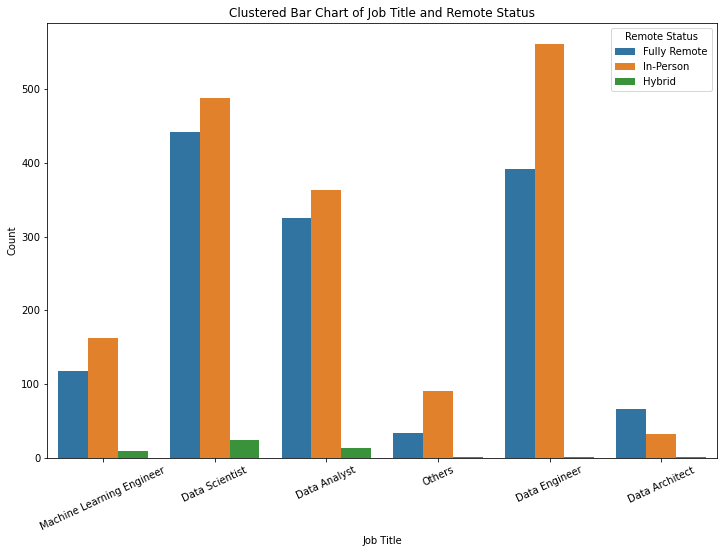

In [48]:
# plot clustered bar chart of job title and remote status

plt.figure(figsize=(12, 8))
sns.countplot(data = df, x = 'job_title', hue = 'remote_status')
plt.title('Clustered Bar Chart of Job Title and Remote Status')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.legend(title = 'Remote Status')
plt.xticks(rotation = 25)
plt.show()

> This plot suggests most roles have a higher proportion of in-person jobs, followed closely by fully remote jobs, with the only exception being Data Architect roles, having their proportions the other way round. However, all roles have very low proportions of hybrid jobs.

In [49]:
# determine count of experience levels

experience_count = df['experience_level'].value_counts()

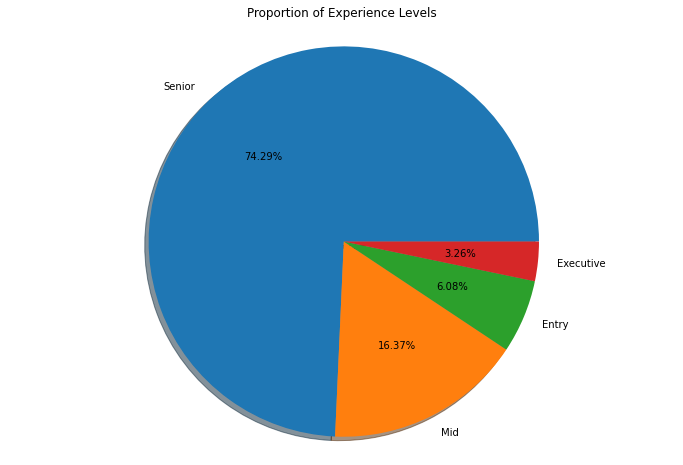

In [50]:
# plot pie chart of experience levels

plt.figure(figsize=(12, 8))
plt.pie(experience_count.values, labels = experience_count.index, autopct='%1.2f%%', shadow=True)
plt.title("Proportion of Experience Levels")
plt.axis('equal')
plt.show()

> The plot indicates that Senior level roles make up over 70% of the job market, indicating a high demand for experiecned professionals. The second highest proportion is the Mid level with aboiut 16%, followed by Entry level roles with about 6%. Executive levels have the least proportion of about 3%, possibly due to the few high paying jobs for professionals with the highest level of experience/expertise.

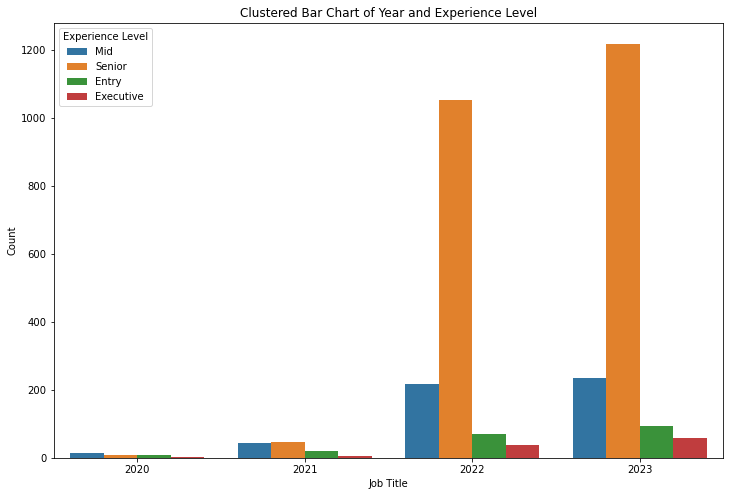

In [51]:
# plot clustered bar chart of work year and experience level

plt.figure(figsize=(12, 8))
sns.countplot(data = df, x = 'work_year', hue = 'experience_level')
plt.title('Clustered Bar Chart of Year and Experience Level')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.legend(title = 'Experience Level')
plt.show()

> The yearly distribution of experience level shows that Mid level roles initially had the highest proprtion of jobs in 2020. However, Senior level grew from 2021 and now have a significantly higher proportion than any other experience level. Entry and Executive jobs remained consistently low through the years, indicating fewer opportunities at beginner and leadership levels. This trend suggests that the data science field heavily favors senior level professionals, making it crucial for job seekers to build strong skills and experience to stay competitive.

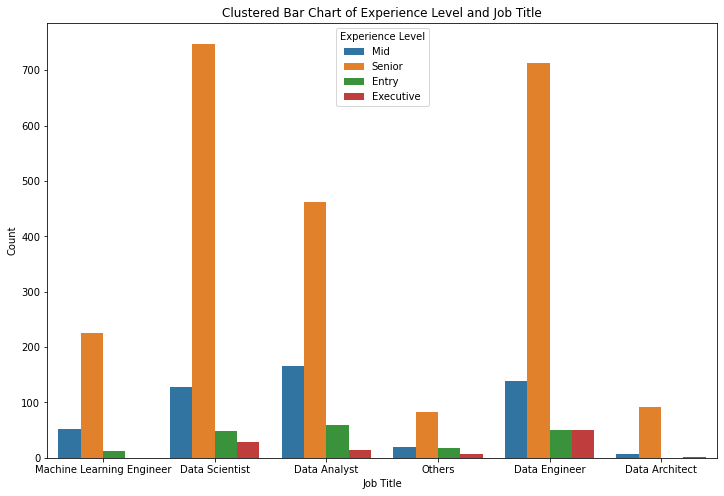

In [52]:
# plot clustered bar chart of job title and experience level

plt.figure(figsize=(12, 8))
sns.countplot(data = df, x = 'job_title', hue = 'experience_level')
plt.title('Clustered Bar Chart of Experience Level and Job Title')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.legend(title = 'Experience Level')
plt.show()

> Senior roles have the highest proportions across all job titles, especially for Data Scientists and Data Engineers. Mid level positions are most common for Data Analysts, but are less frequent in other job titles. Entry level and Executive roles have very low proportions across all jobs, with Data Engineers and Data Scientists having the most representation at the Executive level. In addition, Machine Learning Engineers and Data Architects in particular have very few Entry level positions, suggesting that these roles require more expertise and experience.

#### 5. What are the in demand skills in the Data Science field?

A bar chart and word cloud would be viewed to explore the in demand skills in the Data Science field

In [53]:
# Flatten all words into a single list
all_words = [word.strip().title() for skills in df_skills['job_skills'].dropna() for word in skills.split(',')]

# Count occurrences
freq = Counter(all_words)

In [54]:
# create pandas series of skills

skills_data = pd.Series(freq)
display(skills_data)

Machine Learning                             2684
Programming                                   265
Python                                       4810
Scala                                        1039
Java                                         1434
                                             ... 
Data Vault Express                              1
Workers Compensation                            1
Cloudbased Data Warehouse Products              1
Experience And Judgment                         1
Graduation From Accredited Mt/Mls Program       1
Length: 64963, dtype: int64

In [55]:
# sort count of skills from highest to lowest

skills_data.sort_values(ascending = False, inplace = True)

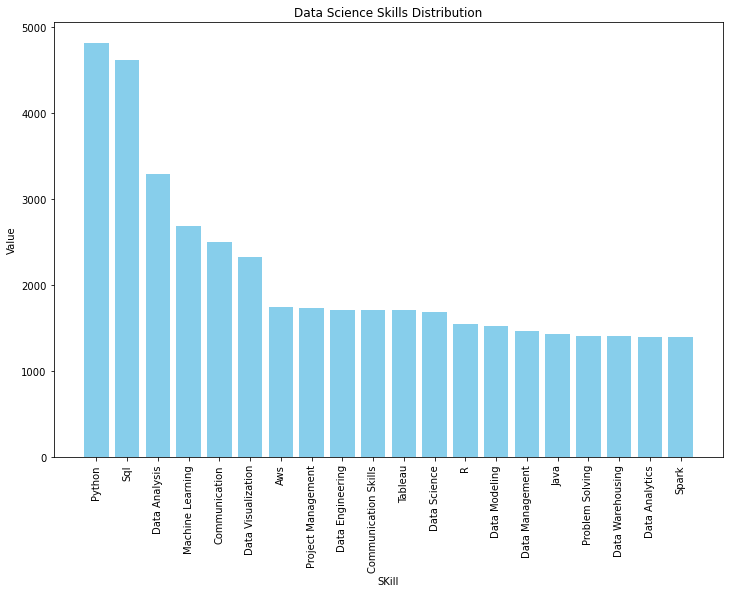

In [56]:
# create a bar chart of the top 20 skills

plt.figure(figsize=(12, 8))
plt.bar(skills_data.index[:20], skills_data.values[:20], color='skyblue')
plt.title("Data Science Skills Distribution")
plt.xlabel("SKill")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.show()

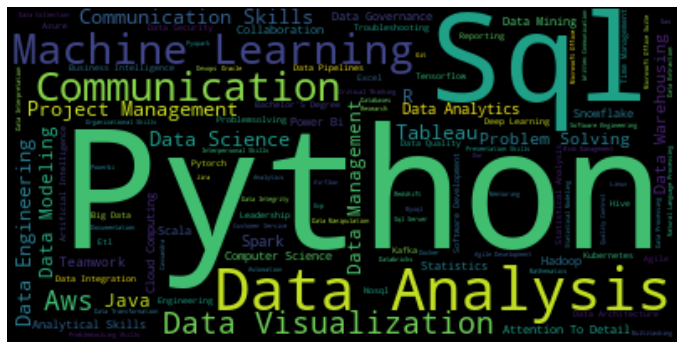

In [57]:
# generate wordcloud to visualize the most in demand data science skills

plt.figure(figsize=(12, 8))

wordcloud = WordCloud().generate_from_frequencies(freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

> The plots above show that Python and SQL are the most in demand skills required in the data science field. Some less common but also important technical skills include R, Tableau, etc. The plots also show that soft skills, such as communication, project management, and problem solving, are important in the data science field.

#### 6. What are the proportions of employment types in the Data Science field?

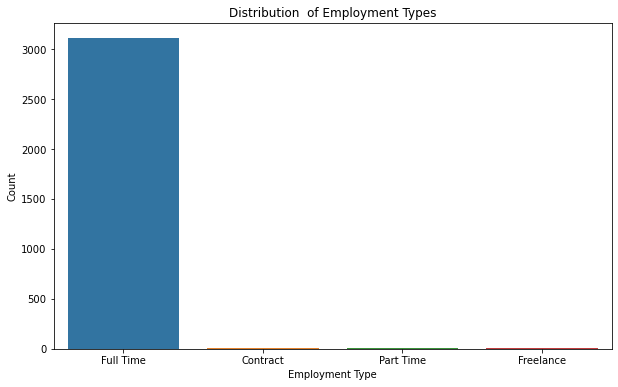

In [58]:
# plot bar chart of employment types

plt.figure(figsize=(10, 6))

sns.countplot(data = df, x = 'employment_type', order = df['employment_type'].value_counts().index)
plt.title('Distribution  of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

> The distribution of employment types above shows that most jobs in the data science field are full time jobs, with the proportions of contract, part time and freelance jobs being extremely low.

### Hypothesis Testing

Hypothesis testing would be performed on some variables of the dataset. T-tests would be performed between the salaries of categories within the categorical variables, while chi-squared tests would be performed on some categorical variables.

#### T-Test

Define Null and Alternate Hypotheses

- Null Hypothesis: There is no significant difference between the salaries of two categories within a variable
- Alternate Hypothesis: There is a significant difference between the salaries of two categories within a variable

In [59]:
# define function to compute the t-test of salaries between categorical columns using a significance level of 0.05

def ttest(df, column, salary_in_cad):
    
    # create list of unique categories
    categories = df[column].unique()
    
    # create empty dataframe to be replaced later by computed p-values
    ttest_p_vals = pd.DataFrame(np.zeros((len(categories), len(categories))), columns=categories, index=categories)
    
    # write for loop to compute p-values across columns
    for i in range(len(categories)):
        for j in range(len(categories)):
            df1 = df[df[column] == categories[i]]
            df2 = df[df[column] == categories[j]]

            test = ttest_ind(df1['salary_in_cad'], df2['salary_in_cad'])

            ttest_p_vals.iloc[i, j] = test.pvalue
            
            
    # visualize heatmap of t-test p-values

    fig, ax = plt.subplots(figsize=(12, 8))

    im = ax.imshow(ttest_p_vals)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(range(len(ttest_p_vals.columns)))

    ax.set_xticklabels(labels=ttest_p_vals.columns,
                  rotation=45, ha="right", rotation_mode="anchor")

    ax.set_yticks(range(len(ttest_p_vals.index)))

    ax.set_yticklabels(labels=ttest_p_vals.index,
                  ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(ttest_p_vals.index)):
        for j in range(len(ttest_p_vals.columns)):
            text = ax.text(j, i, round(ttest_p_vals.iloc[i, j], 2),
                           ha="center", va="center", color="w")

    ax.set_title("T-Test P-Values of {}".format(column))
    ax.set_xlabel("Categories")
    ax.set_ylabel("Categories")
    ax.figure.colorbar(im)
    plt.show()

In [60]:
# create list of categorical columns

cat_cols = ['work_year', 'experience_level', 'employment_type', 'job_title',
            'company_location', 'company_size', 'remote_status']

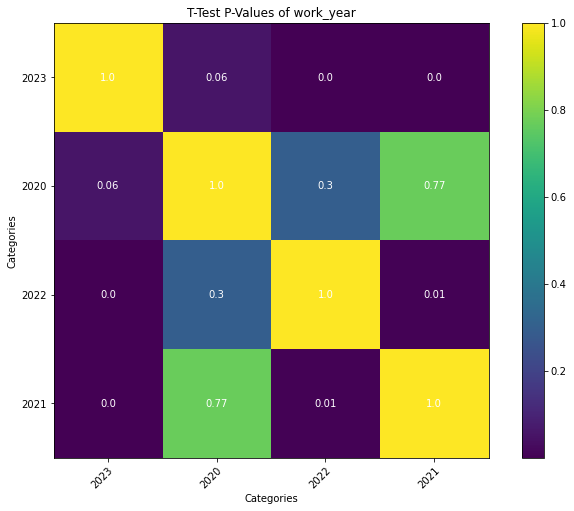

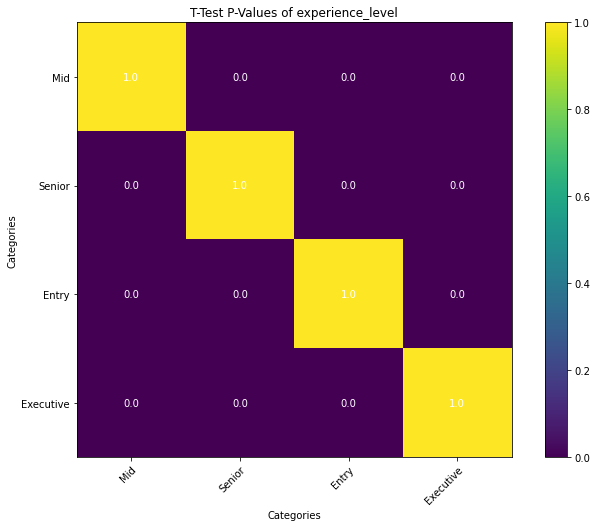

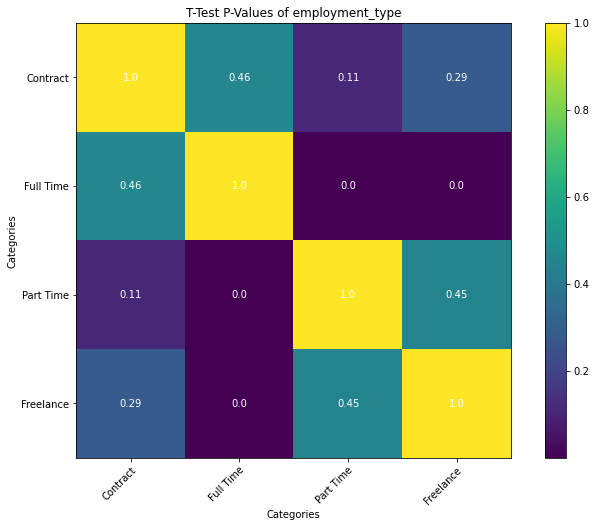

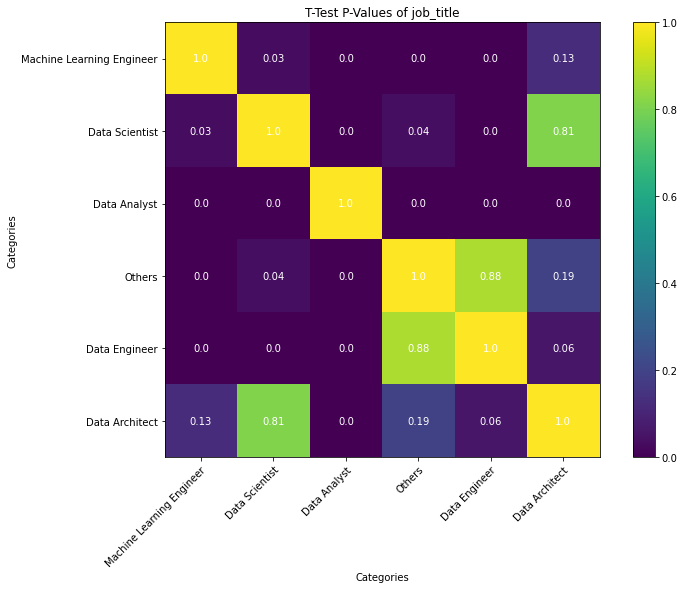

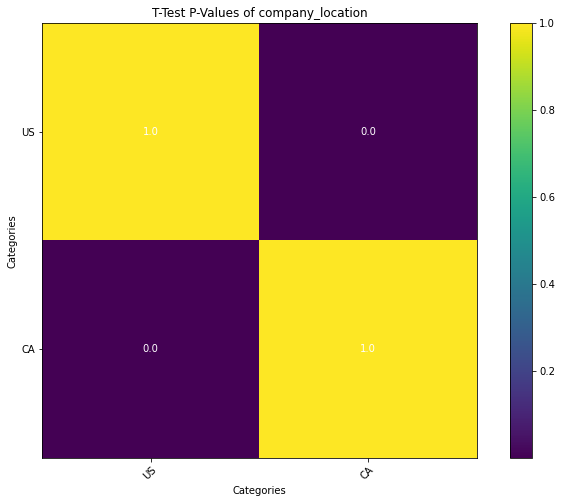

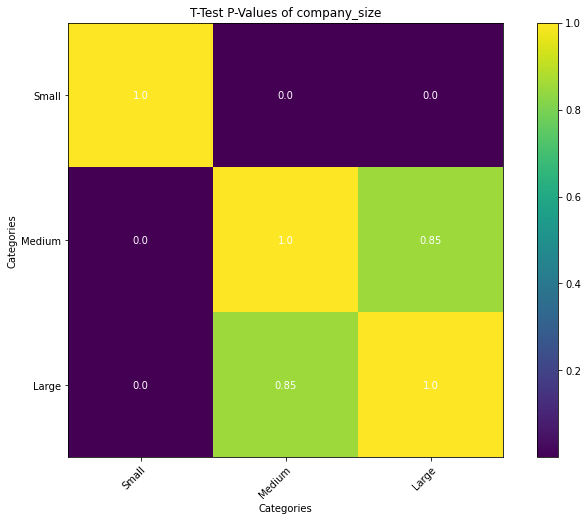

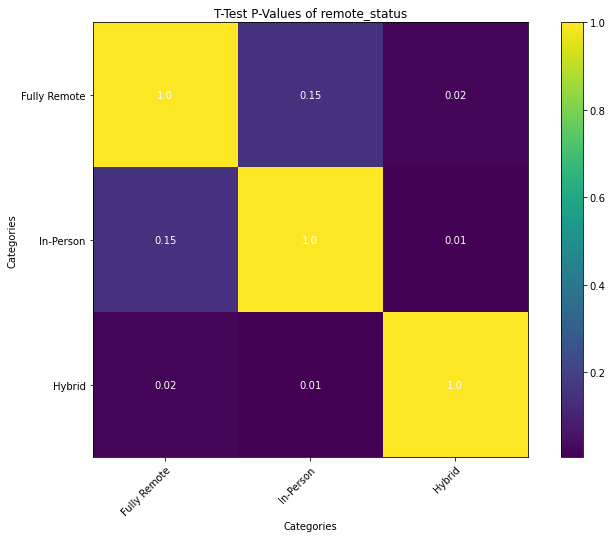

In [61]:
# write for loop to plot p-value heatmaps for categorical columns

for column in cat_cols:
    ttest(df, column, 'salary_in_cad')

**Work Year**
> Salaries from 2020 and 2021 were similar, but changed significantly in later years. The biggest salary shifts happened after 2021, possibly reflecting industry growth or post-pandemic market changes.

**Experience Level**
> The p-values being less than 0.05 across the entire heatmap indicates that there is a significant difference between the salaries of all experience levels, as expected.


**Employment Type**
> Full-time jobs had significantly higher salaries than part-time and freelance roles. Also, contract salaries are not significantly different from full-time or freelance, meaning they can vary widely. In addition, part-time and freelance roles have similar salary structures, which supports the fact that they generally pay less than full-time positions.


**Job Title**
> Most data roles have significantly different salaries, especially Data Analysts, who earn less than other roles. The high p-value between Data Architects & Data Scientists indicate those roles earn similar salaries, suggesting they may be equally valued in organizations. Data Architects & Data Engineers also have some slight similarities between salaries, although not so much. In addition, Data Engineers and Others have similar salaries, suggesting some roles in the "Others" category earn similar salaries to Data Engineers.


**Company Location**
> The p-value of 0 between US and Canada jobs indicates that there is a statistically significant difference in salaries between the two locations. This confirms that salaries in the US and Canada are not the same, with the US offering higher salaries.


**Company Size**
> The heatmap of company size shows there is a statistically significant difference between the salaries of small companies and both medium & large companies. The heatmap also shows that there is no significant difference between the salaries of medium and large companies.

**Remote Status**
> There is a statistically significant difference between the salaries of fully remote jobs and hybrid jobs, while there is no difference between fully remote and in-person jobs. There is also a statistically significant difference between the salaries of in-person and hybrid jobs.

#### Chi-Squared Test
Define Null and Alternate Hypotheses

- Null Hypothesis: The two variables are independent and there is no relationship
- Alternate Hypothesis: The two variables are dependent and there is a relationship

In [62]:
# create dataframe of categorical columns

df_cat = df[['work_year', 'experience_level', 'employment_type', 'job_title',
            'company_location', 'company_size', 'remote_status']]

df_cat

,work_year,experience_level,employment_type,job_title,company_location,company_size,remote_status
1,2023,Mid,Contract,Machine Learning Engineer,US,Small,Fully Remote
2,2023,Mid,Contract,Machine Learning Engineer,US,Small,Fully Remote
3,2023,Senior,Full Time,Data Scientist,CA,Medium,Fully Remote
4,2023,Senior,Full Time,Data Scientist,CA,Medium,Fully Remote
5,2023,Senior,Full Time,Data Scientist,US,Large,In-Person
...,...,...,...,...,...,...,...
3749,2021,Senior,Full Time,Others,US,Large,Fully Remote
3750,2020,Senior,Full Time,Data Scientist,US,Large,Fully Remote
3751,2021,Mid,Full Time,Data Scientist,US,Large,Fully Remote
3752,2020,Entry,Full Time,Data Scientist,US,Small,Fully Remote


In [63]:
# create empty dataframe to be replaced later by computed p-values

chi_p_vals = pd.DataFrame(np.zeros((df_cat.shape[1], df_cat.shape[1])), columns=df_cat.columns, index=df_cat.columns)
chi_p_vals

,work_year,experience_level,employment_type,job_title,company_location,company_size,remote_status
work_year,0.0,0.0,0.0,0.0,0.0,0.0,0.0
experience_level,0.0,0.0,0.0,0.0,0.0,0.0,0.0
employment_type,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_title,0.0,0.0,0.0,0.0,0.0,0.0,0.0
company_location,0.0,0.0,0.0,0.0,0.0,0.0,0.0
company_size,0.0,0.0,0.0,0.0,0.0,0.0,0.0
remote_status,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# write for loop to compute p-values across columns

for i in range(df_cat.shape[1]):
    for j in range(df_cat.shape[1]):
        df_chi = pd.crosstab(df_cat.iloc[:,i], df_cat.iloc[:,j])
        test = chi2_contingency(df_chi)
        chi_p_vals.iloc[i, j] = test[1]

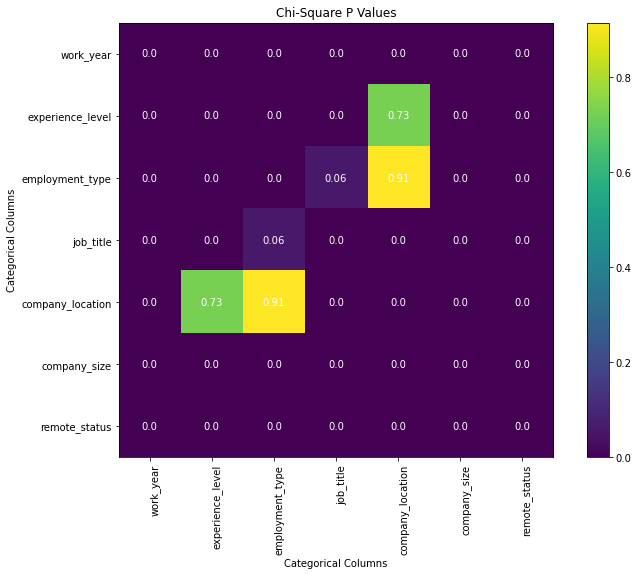

In [65]:
# visualize heatmap of chi-square p values

fig, ax = plt.subplots(figsize=(12, 8))

im = ax.imshow(chi_p_vals)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(chi_p_vals.columns)))

ax.set_xticklabels(labels=chi_p_vals.columns,
              rotation=90, ha="right", rotation_mode="anchor")

ax.set_yticks(range(len(chi_p_vals.index)))

ax.set_yticklabels(labels=chi_p_vals.index,
              ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(chi_p_vals.index)):
    for j in range(len(chi_p_vals.columns)):
        text = ax.text(j, i, round(chi_p_vals.iloc[i, j], 2),
                       ha="center", va="center", color="w")

ax.set_title("Chi-Square P Values")
ax.set_xlabel("Categorical Columns")
ax.set_ylabel("Categorical Columns")
ax.figure.colorbar(im)
plt.show()

> The plot indicates that there is no statistical relationship between employment type and job title, employment type and company location, or experience levels and company locations. However, all other categorical variables are statistically dependent on each other, and have relationships between themselves.

<a id='conclusion'></a>
## Conclusion

This analysis of data science jobs between 2020 and 2023 provides insights into salary trends, job distributions, experience levels, company locations, remote work trends, employment types, job titles, company sizes, and required skills. Below are some key takeaways:

**Growth of Data Science Jobs**
- The number of data science jobs has grown significantly over the past four years, with a notable boom between 2021 and 2022.
- Data Engineering roles have become more prevalent, surpassing Data Scientists as the most common role in 2023.

**Salary Insights**
- Most salaries range between 150,000 and 300,000, with a few roles exceeding 400,000.
- Machine Learning Engineers and Data Architects have the highest median salaries, while Data Analysts earn the least.
- Salaries increase with experience, with Executives earning the most of around 300,000 and above, while entry level professionals earn the least of around 140,000 and below.
- Jobs in the US generally pay higher salaries than jobs in Canada, with wider salary ranges and more high-paying roles.
- Larger companies offer higher salaries compared to medium and small companies.

**Experience Level Trends**
- Senior roles have the highest proportion of jobs in the job market, making up over 70% of the dataset.
- Mid level roles are more common among Data Analysts, while Executive roles are mostly filled by Data Scientists and Data Engineers.
- Entry level positions are relatively scarce, with Machine Learning Engineers and Data Architects rarely having them.

**Remote Work Trends**
- Fully remote roles were dominant between 2020 and 2022, likely due to the COvid-19 pandemic.
- In-person roles surged in 2023, suggesting companies are shifting back to pre-pandemic work arrangements.
- Hybrid roles have consistently remained low throughout the years.

**Relevant Skills**
- Python and SQL are the most in-demand skills, followed by Data Analysis, Machine Learning, and Communication.
- Some other technical skills such as AWS, R and visualization tools, such as Tableau, Power BI are also highly valued.
- Soft skills like Communication, Problem-Solving, and Project Management are also emphasized in job descriptions, and are equally important in the data science field.

**Statistical Relationships**
- There is no statistical relationship between employment type and job title, employment type and company location, or experience level and company location. All other categorical variables are statistically dependent, meaning they influence one another.

**Final Thoughts**

The Data Science job market is growing, with increasing demand for skilled professionals, rising salaries, a shift back to in-person work, etc. Professionals seeking higher salaries may target US-based jobs and larger companies. In addition, professionals should ensure they continuously develop high-demand skills like Python, SQL, Machine Learning, Communication, etc., to ensure they stay relevant in the field.


The high demand for senior expertise should serve as motivation rather than discouragement. Internships and networking opportunities can be valuable entry points into the field.

This analysis provides valuable insights for data science professionals, job seekers, employers, etc., looking to understand trends in the Data Science industry.